In [1]:
!pip install benchmarx==0.0.10 --quiet

In [4]:
# Imports
from benchmarx import Benchmark, QuadraticProblem
import jax.numpy as jnp
from jax import random, grad
from jaxopt import BacktrackingLineSearch

In [10]:
# Create Quadratic Problem
n = 7       # dimension
qp = QuadraticProblem(n=n)

# initial point
RNG = random.PRNGKey(1230)
RNG, _ = random.split(RNG)
x_init = random.normal(RNG, (n,))

In [11]:
ls_armijo = BacktrackingLineSearch(fun=qp.f, maxiter=20, condition="armijo",
                            decrease_factor=0.8)
ls_strong_wolfe = BacktrackingLineSearch(fun=qp.f, maxiter=20, condition="strong-wolfe",
                            decrease_factor=0.8)

In [22]:
benchmark = Benchmark(
        problem=qp,
        runs=3,
        methods= [
            {
                'GRADIENT_DESCENT_ls_armijo': {
                    'x_init' : x_init,
                    'tol': 1e-9,
                    'maxiter': 100,
                    'stepsize' : 1e-1,
                    'linesearch': ls_armijo,
                    'acceleration': False,
                    'label': 'GD_ls_armijo'
                },
                'GRADIENT_DESCENT_ls_strong_wolfe': {
                    'x_init' : x_init,
                    'tol': 1e-9,
                    'maxiter': 100,
                    'stepsize' : 1e-1,
                    'linesearch': ls_strong_wolfe,
                    'acceleration': False,
                    'label': 'GD_ls_strong_wolfe'
                }
            }
        ],
        metrics=[
            "nit",
            "history_x",
            "history_f",
            "history_df"
        ]
    )

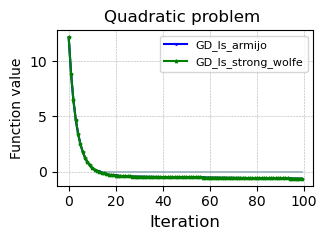

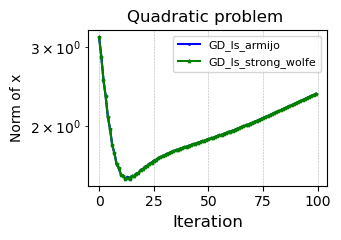

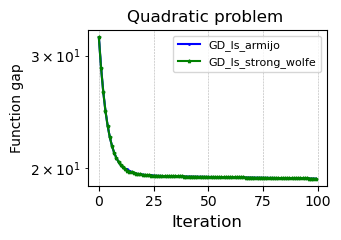

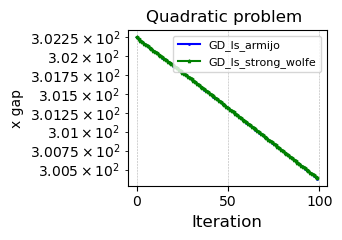

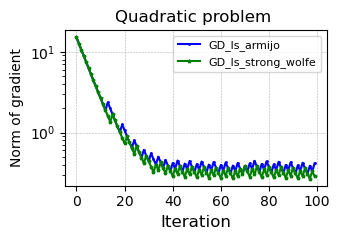

In [23]:
result = benchmark.run()
result.plot(
        metrics_to_plot= ['fs', 'xs_norm', 'f_gap', 'x_gap', 'grads_norm'],
        data_path='linesearch_data.json',
        dir_path='plots',
        fname_append='linesearch',
        show=True
    )

In [26]:
benchmark = Benchmark(
        problem=qp,
        runs=3,
        methods= [
            {
                'GRADIENT_DESCENT_armijo_step': {
                    'x_init' : x_init,
                    'tol': 1e-9,
                    'maxiter': 100,
                    'stepsize' : 0.1,
                    'linesearch': 'backtracking',
                    'condition': 'armijo',
                    'acceleration': False,
                    'label': 'GD_armijo'
                },
                'GRADIENT_DESCENT_goldstein_step': {
                    'x_init' : x_init,
                    'tol': 1e-9,
                    'maxiter': 100,
                    'stepsize' : 0.1,
                    'linesearch': 'backtracking',
                    'condition': 'goldstein',
                    'acceleration': False,
                    'label': 'GD_goldstein'
                }
            }
        ],
        metrics=[
            "nit",
            "history_x",
            "history_f",
            "history_df"
        ]
    )

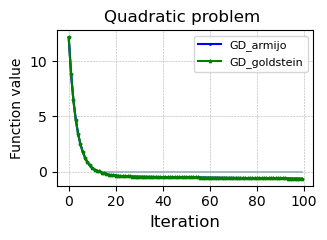

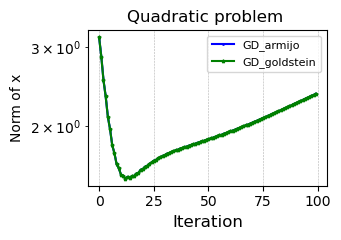

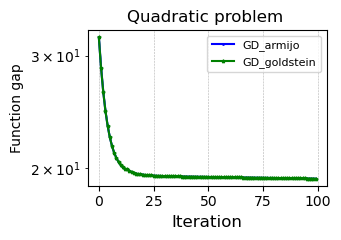

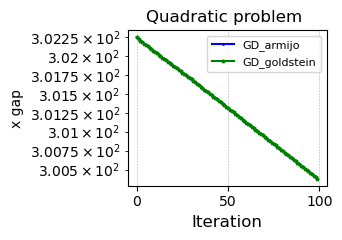

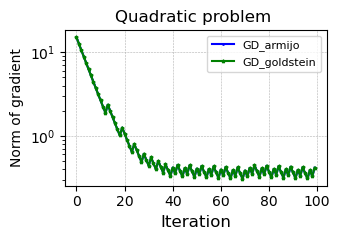

In [27]:
result = benchmark.run()
result.plot(
        metrics_to_plot= ['fs', 'xs_norm', 'f_gap', 'x_gap', 'grads_norm'],
        data_path='linesearch2_data.json',
        dir_path='plots',
        fname_append='linesearch2',
        show=True
    )